# EDA on general features & after tokenization

## Import data & modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

## Light general exploration

In [50]:
print(df.columns)

Index(['url', 'story_id', 'soup', 'title', 'author', 'contest_num',
       'won_contest', 'num_likes', 'num_comments', 'story_html',
       'date_published', 'num_sent', 'words', 'num_words', 'unique_words',
       'num_unique_words', 'unique_words_percent', 'punctuation', 'num_cats',
       'cat_Western', 'cat_Adult', 'cat_East', 'cat_Color', 'cat_Christian',
       'cat_School', 'cat_Kids', 'cat_Fiction', 'cat_Holiday', 'cat_Desi',
       'cat_Black', 'cat_Asian', 'cat_Latinx', 'cat_Gay', 'cat_Drama',
       'cat_Adventure', 'cat_Coming', 'cat_Transgender', 'cat_Middle',
       'cat_Indigenous', 'cat_Suspense', 'cat_Nonfiction', 'cat_Young',
       'cat_Thriller', 'cat_Friendship', 'cat_Contemporary', 'cat_Sad',
       'cat_Romance', 'cat_Fantasy', 'cat_Lesbian', 'cat_Mystery',
       'cat_American', 'cat_Christmas', 'cat_Age', 'cat_Bedtime', 'cat_Happy',
       'cat_Teens', 'cat_Speculative', 'cat_Crime', 'cat_Urban', 'cat_People',
       'cat_Creative', 'cat_Horror', 'cat_Inspirati

In [51]:
print('Dataset dimensions:', df.shape)
print('Does the dataset contain NA?', df.isna().any().any())
print('Data types in dataset:')
print(df.dtypes.value_counts())

Dataset dimensions: (887, 68)
Does the dataset contain NA? True
Data types in dataset:
int64      55
object     12
float64     1
dtype: int64


In [54]:
numerical = ['num_likes', 'num_comments', 'num_sent', 'num_words', 'num_unique_words', 'unique_words_percent']

In [46]:
df[numerical].describe()

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,14.512965,4.717024,119.040586,1795.350620,659.064262,0.380788
std,21.576877,21.759873,52.393809,671.074451,192.155444,0.055200
min,0.000000,0.000000,5.000000,941.000000,320.000000,0.215301
25%,8.000000,0.000000,80.000000,1204.000000,499.500000,0.340399
50%,10.000000,1.000000,111.000000,1602.000000,618.000000,0.380668
75%,14.000000,3.000000,148.000000,2289.000000,802.000000,0.417466
max,460.000000,420.000000,356.000000,3829.000000,1470.000000,0.545859


In [56]:
with pd.option_context('display.max_rows', 1, 'display.max_columns', None): 
    display(df.sample(5))

,url,story_id,soup,title,author,contest_num,won_contest,num_likes,num_comments,story_html,date_published,num_sent,words,num_words,unique_words,num_unique_words,unique_words_percent,punctuation,num_cats,cat_Western,cat_Adult,cat_East,cat_Color,cat_Christian,cat_School,cat_Kids,cat_Fiction,cat_Holiday,cat_Desi,cat_Black,cat_Asian,cat_Latinx,cat_Gay,cat_Drama,cat_Adventure,cat_Coming,cat_Transgender,cat_Middle,cat_Indigenous,cat_Suspense,cat_Nonfiction,cat_Young,cat_Thriller,cat_Friendship,cat_Contemporary,cat_Sad,cat_Romance,cat_Fantasy,cat_Lesbian,cat_Mystery,cat_American,cat_Christmas,cat_Age,cat_Bedtime,cat_Happy,cat_Teens,cat_Speculative,cat_Crime,cat_Urban,cat_People,cat_Creative,cat_Horror,cat_Inspirational,cat_Historical,cat_Science,cat_High,cat_African,cat_Funny
181,https://blog.reedsy.com/short-story/ga5r2g/,ga5r2g,<!DOCTYPE html>\n\n<html>\n<head>\n<meta chars...,Apex,Sundance Lee,"['Contest', '#78']",NaN,5,2,"<article class=""font-alt submission-content sp...",2021-01-29 21:52:00,90,['I' 've' 'never' ... 'with' 'pure' 'enjoyment'],1509,"{'aggression', 'differ', 'better', 'on', 'I', ...",636,0.421471,"['’' ',' '.' '?' '.' ',' '’' '.' '.' ',' ',' '...",4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


## Distributions

Distribution of numerical features:

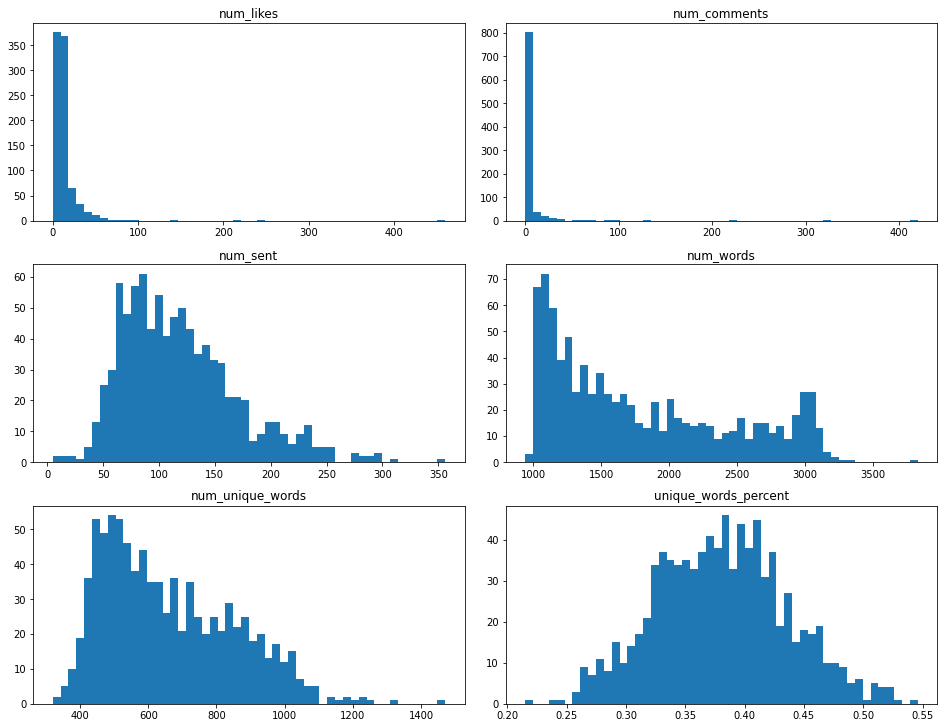

In [58]:
my_j = int(len(numerical)/2)
f,ax=plt.subplots(my_j,2, figsize=(13,10), constrained_layout = True)
feat_iter=iter(numerical)
for i in range(my_j):
    for j in range(2):
      try:
        x = next(feat_iter)
        ax[i,j].hist(df[x], bins=50)
        ax[i,j].set_title(x)
      except StopIteration:
          pass

Distribution of target

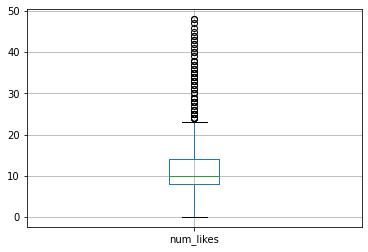

In [65]:
threshold = 50
df[df.num_likes<threshold].boxplot(column='num_likes')

Distribution of categorical features:

In [67]:
categories = [col for col in df if col.startswith('cat')]
categories.remove('cat_Fiction')
# for cat in categories:
#   df.boxplot(column='num_likes', by=cat, vert=False)
#   plt.title(f'num_likes distribution per {cat}')
#   plt.suptitle('')
#   plt.show()

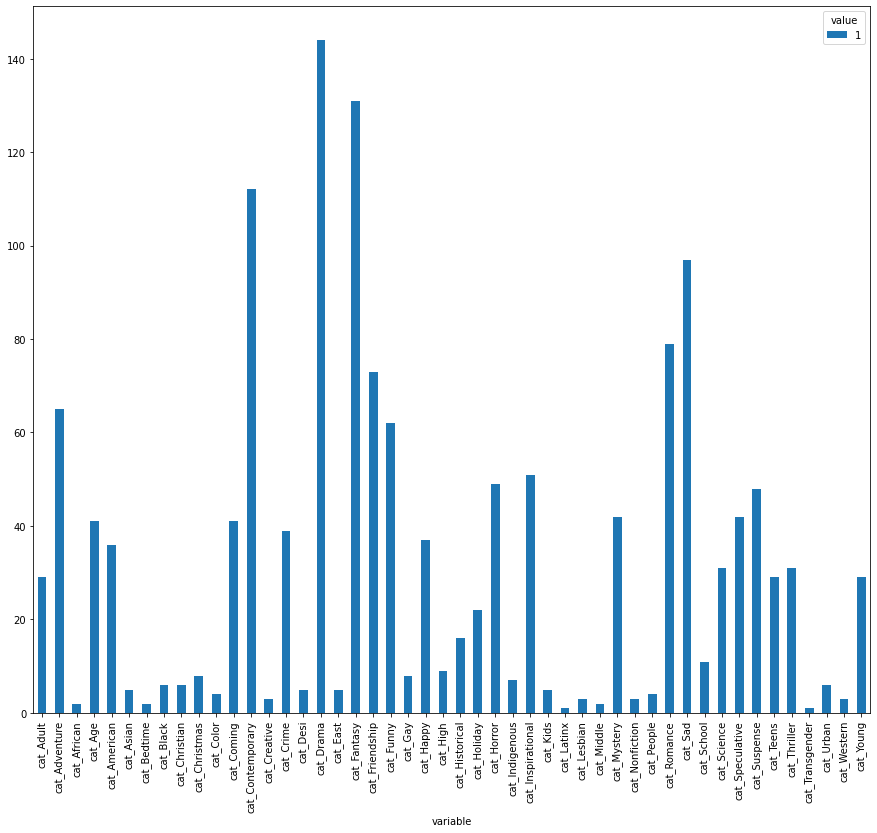

In [68]:
dfm = df[categories].melt()
dfm = dfm[dfm.value==1]
plot_df = (
    pd.crosstab(dfm['variable'], dfm['value'])
)
plot_df.plot.bar(figsize=(15,13))
# plt.tight_layout()
# plt.show()


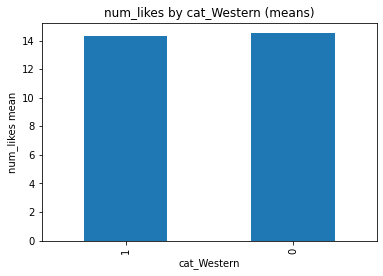

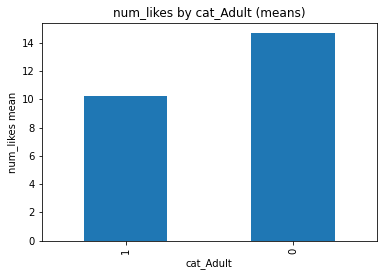

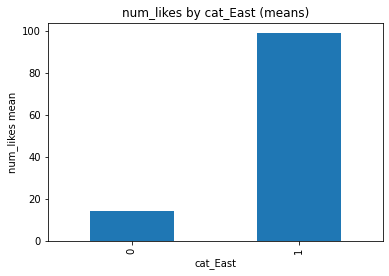

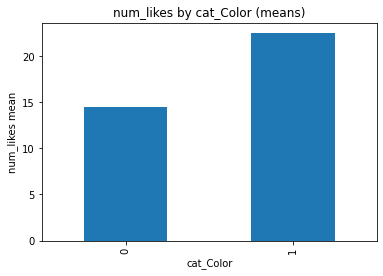

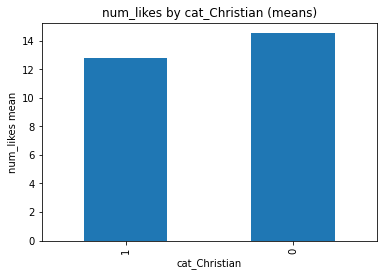

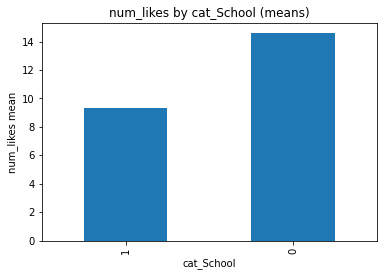

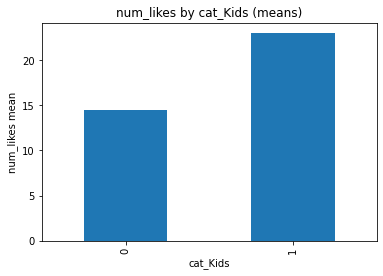

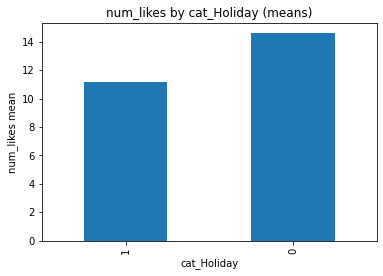

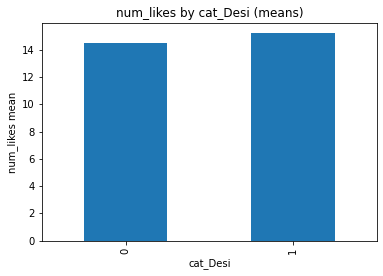

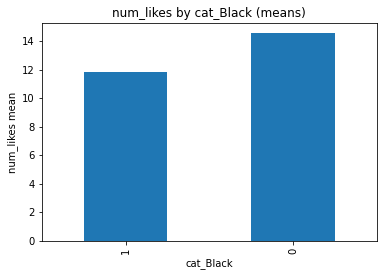

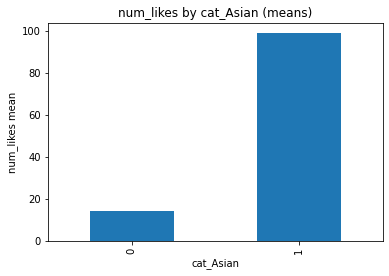

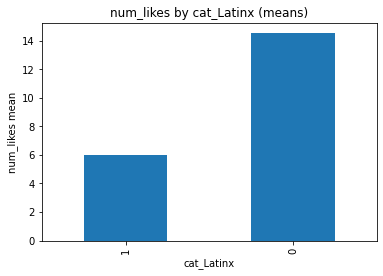

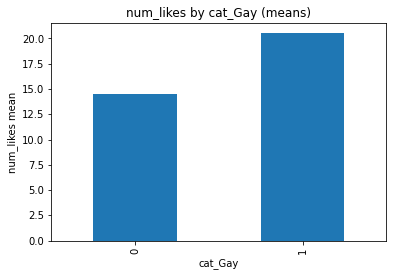

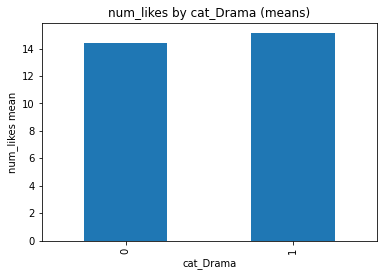

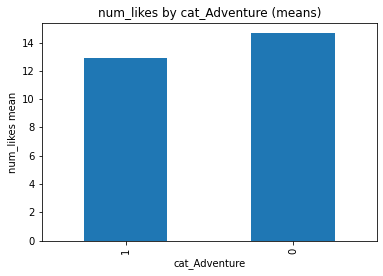

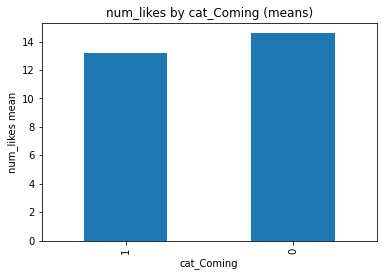

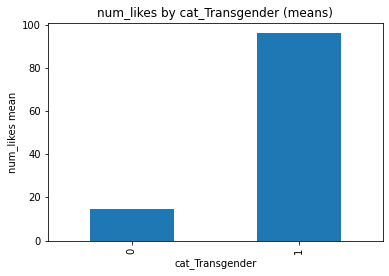

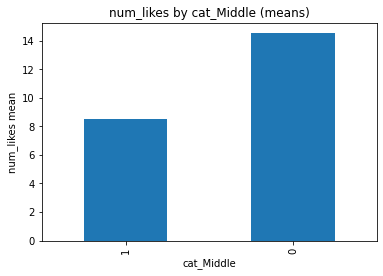

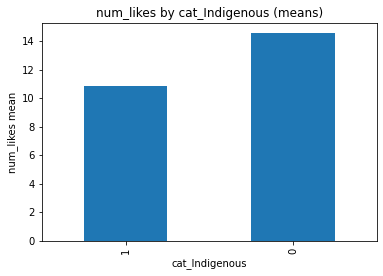

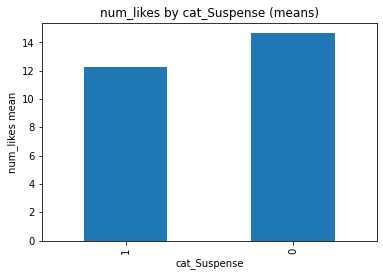

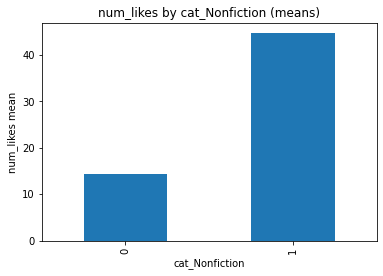

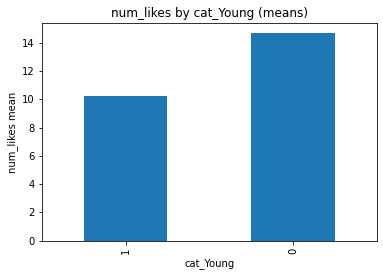

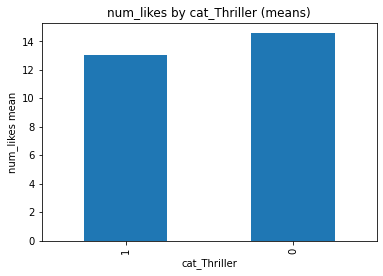

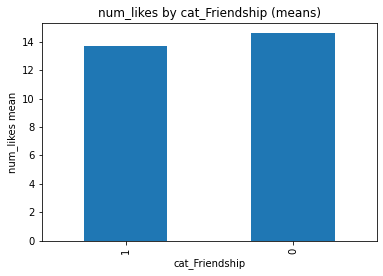

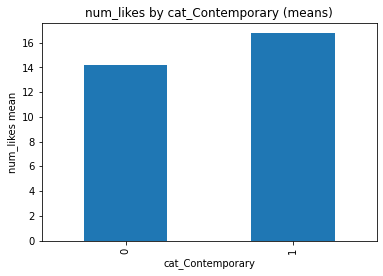

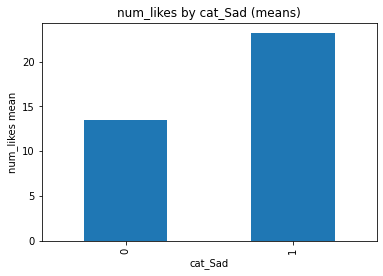

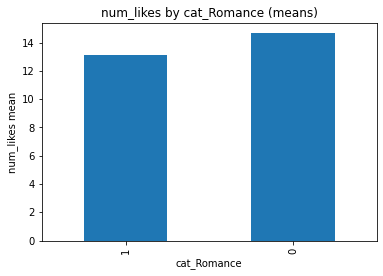

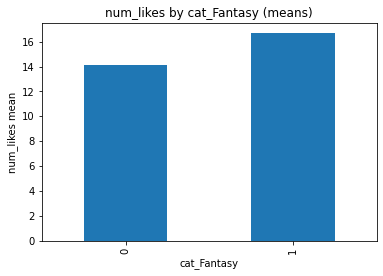

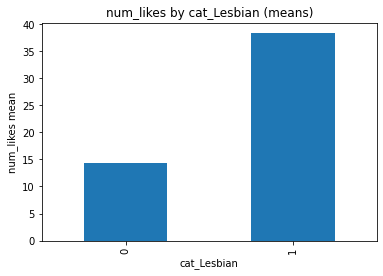

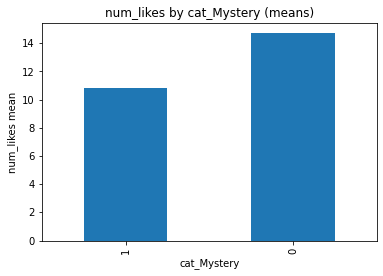

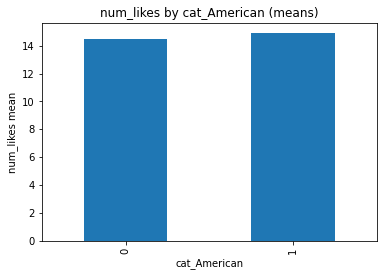

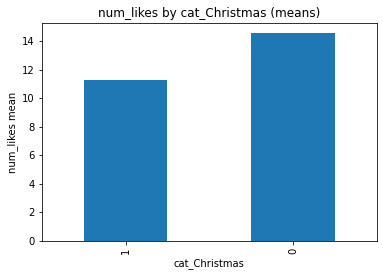

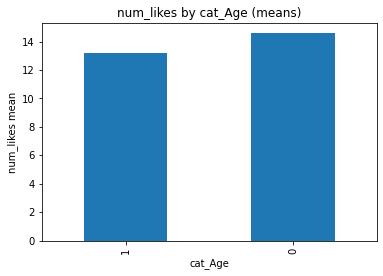

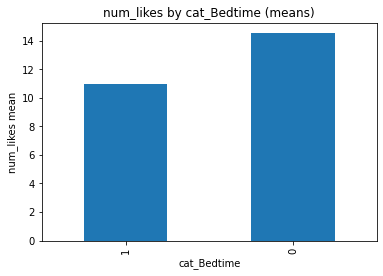

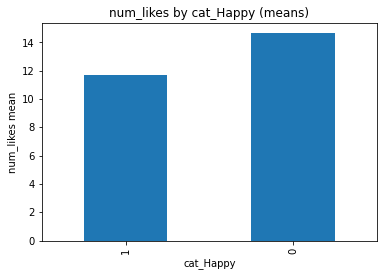

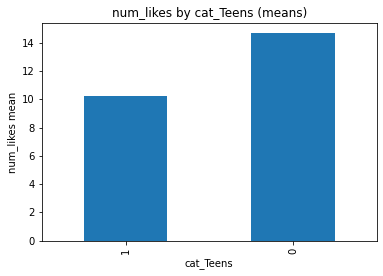

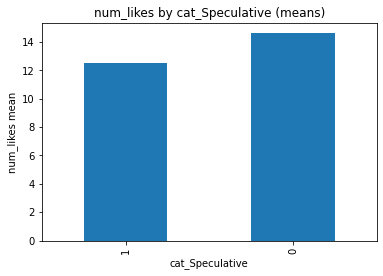

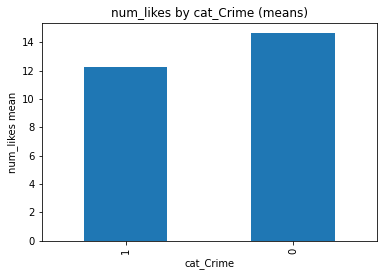

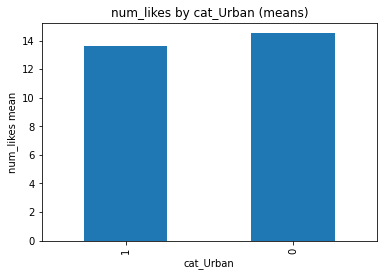

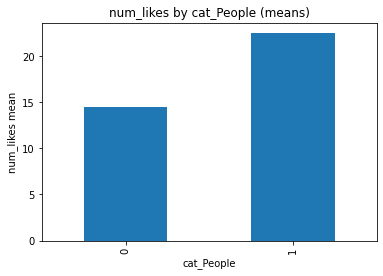

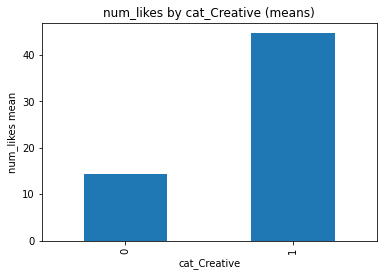

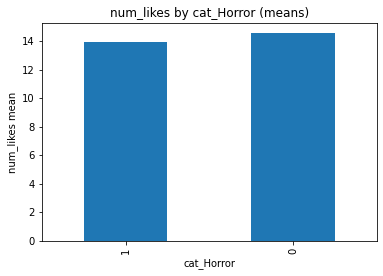

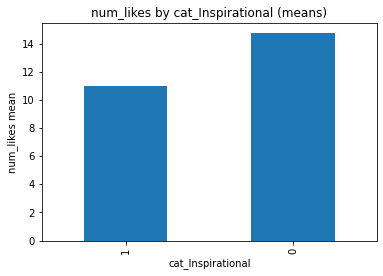

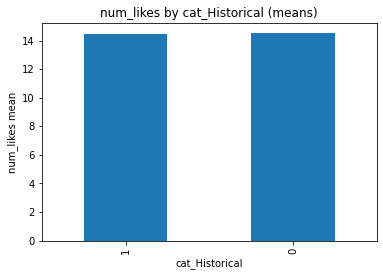

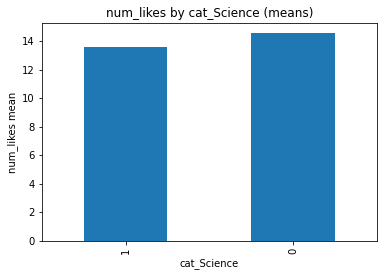

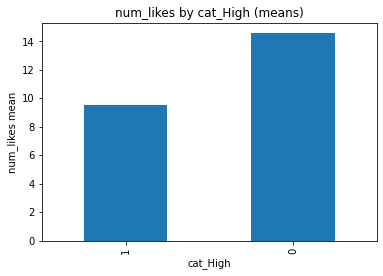

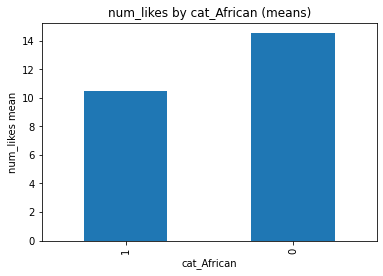

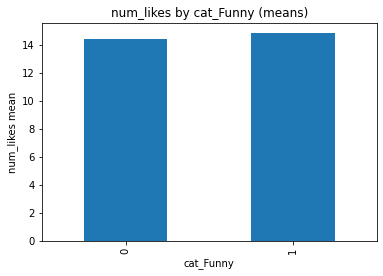

In [73]:
target = 'num_likes'
for var_to_plot in categories:
  df.groupby(var_to_plot)[target].mean().sort_values().plot.bar()
  plt.title(f"{target} by {var_to_plot} (means)")
  plt.ylabel(f"{target} mean")
  plt.show()

## Against target

Correlation of numerical features with target

In [70]:
target = 'num_likes'
threshold = 400
for my_var in numerical:
  print(my_var ,'= ', df[df.num_likes<threshold][my_var].corr(df[df.num_likes<threshold][target]))

num_likes =  0.9999999999999999
num_comments =  0.6432392097337749
num_sent =  0.0012154643517730548
num_words =  -0.007867821676788032
num_unique_words =  0.014225364162614674
unique_words_percent =  0.0391326806766174


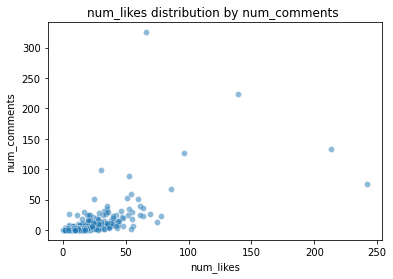

In [71]:
var_to_plot = 'num_comments'
sns.scatterplot(y = var_to_plot, x = target, data = df[df.num_likes<threshold], alpha = 0.5);
plt.title(target + f' distribution by {var_to_plot} ');


## Correlation between features

In [77]:
def color_map(val):
    color = 'red' if float(val) < -0.4 else 'green' if float(val) > 0.2  else 'black'
    return 'color: %s' % color

corr = df[numerical].corr()
df_styled = corr.style.applymap(color_map)
df_styled

,num_likes,num_comments,num_sent,num_words,num_unique_words,unique_words_percent
num_likes,1.000000,0.800481,-0.012056,-0.018921,-0.000451,0.037905
num_comments,0.800481,1.000000,-0.016530,-0.002785,0.016958,0.027381
num_sent,-0.012056,-0.016530,1.000000,0.747821,0.646353,-0.564035
num_words,-0.018921,-0.002785,0.747821,1.000000,0.918999,-0.664380
num_unique_words,-0.000451,0.016958,0.646353,0.918999,1.000000,-0.345331
unique_words_percent,0.037905,0.027381,-0.564035,-0.664380,-0.345331,1.000000


## Date published

In [ ]:
# plots

## Kmeans & PCA

In [110]:
from sklearn.cluster import KMeans
import re
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab


In [116]:
cols = numerical + categories
X = df[cols].head(300)
print(f'The shape of X is {X.shape}')

The shape of X is (300, 54)


In [117]:
titles = df.head(300).title.values
titles = [re.sub('[^A-Za-z0-9]+', '', x.title()) for x in titles]

In [118]:
# choose the number of clusters
k = 3

In [119]:
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

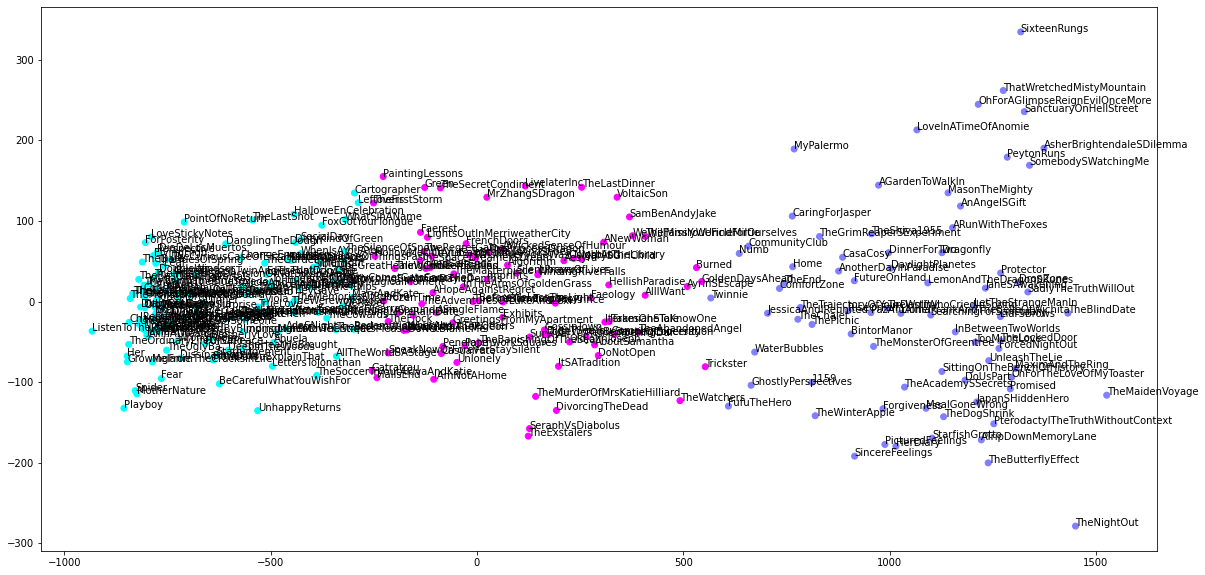

In [120]:
pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(titles):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))

# EDA after feature engineering

## sentiment 

## ??